In [268]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from reviews.config import out_dir

In [269]:
total_df = pd.DataFrame()
for n_topics in [10, 20, 30, 50]:
    for model in ["asum", "jst"]:
        for norm in ["stemming"]: #"lemmatization"

            filename = out_dir / model / f"metrics_{model}_{n_topics}_text_{norm}.csv"

            if not filename.exists():
                continue

            df = pd.read_csv(filename)
            df["model"] = model
            df["normalization"] = norm

            total_df = pd.concat((df, total_df))


(0.0, 1.0)

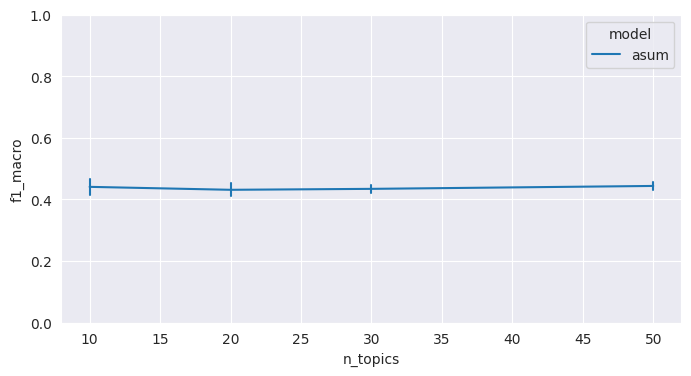

In [270]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(total_df, y="f1_macro", x="n_topics", hue="model", ax=ax, err_style="bars", errorbar="sd") #style="normalization"
ax.set_ylim([0, 1])

In [271]:
from reviews.utils import read_sentiment_words
from reviews.config import data_dir, processed_data_dir
from reviews.utils import flat_sentence_tokens
from itertools import chain
from collections import Counter


In [272]:
NORM = "lemmatization"  # stemming, lemmatization
FIELD = "text"  # text, text+summary


pos_words, neg_words = read_sentiment_words(normalization=NORM)

reviews_df = pd.read_json(
    processed_data_dir / f"reviews_{FIELD}_{NORM}.json.gz", orient="records"
)

# load tokens
too_long = reviews_df["tokens"].apply(lambda x: len(list(chain.from_iterable(x))) > 50)
reviews_df.loc[too_long, "tokens"] = "[]"

print(f"Too Long Reviews: {too_long.sum() / len(reviews_df) * 100:.2f}%")

# docs
sentences = list(reviews_df["tokens"].apply(lambda r: " ".join(chain.from_iterable(r))))
docs = [f"d{i} {x}" for i, x in enumerate(sentences)]

with open(data_dir / "jst" / "docs.dat", "w") as f:
    f.write("\n".join(docs))

# vocabulary
tokens = flat_sentence_tokens(reviews_df["tokens"])
vocabs = [f"{k} {v}" for (k, v) in dict(Counter(tokens)).items()]


Too Long Reviews: 10.14%


In [273]:
f'{len(set(tokens).intersection(pos_words))}, {len(set(tokens))}, {len(pos_words)}'

'26, 14068, 26'

In [274]:
f'{len(set(tokens).intersection(neg_words))}, {len(set(tokens))}, {len(neg_words)}'

'26, 14068, 26'